In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)

sns.set_theme(style='darkgrid')
plt.rcParams["font.family"] = 'arial'
plt.rcParams['text.usetex'] = True

## Exp 1. Baseline Comparison

In [2]:
def make_violinplot(
    results_comparison, 
    gamma=0.002, 
    keys=['accuracy', 'recourse'], 
    palette={'Vanilla': 'tab:blue', 'OAF': 'tab:orange', 'RABIT': 'tab:green'}
):

    plt.figure(figsize=(12, 2 * len(keys)))
    results_gamma = results_comparison[(results_comparison['gamma'] == 0.0) | (results_comparison['gamma'] == gamma)]

    datasets = results_comparison['dataset'].unique()
    palette = {'Vanilla': 'tab:blue', 'OAF': 'tab:orange', 'RABIT': 'tab:green'}

    for i, dataset in enumerate(datasets):
        results_dataset = results_gamma[results_gamma['dataset'] == dataset]

        for j, key in enumerate(keys):
            plt.subplot(len(keys), len(datasets), i + j * len(datasets) + 1)
            sns.violinplot(x='method', y=key, data=results_dataset, hue='method', palette=palette)
            key = key.capitalize() if key != 'AUC' else key
            plt.xlabel('')
            plt.ylabel(key)
            plt.title('{} - {}'.format(dataset, key))
            plt.grid()
                
    plt.tight_layout()
    

def make_barplot(
    results_comparison,
    gamma=0.002,
    key='time',
    palette={'Vanilla': 'tab:blue', 'OAF': 'tab:orange', 'RABIT': 'tab:green'},
    loc='upper left'
):
    plt.figure(figsize=(4, 2.5))
    results_gamma = results_comparison[(results_comparison['gamma'] == 0.0) | (results_comparison['gamma'] == gamma)]

    sns.barplot(x='dataset', y=key, data=results_gamma, hue='method', palette=palette)
    plt.xlabel('')
    plt.ylabel('Time (s)' if key == 'time' else key.capitalize())
    plt.legend(loc=loc)
    plt.tight_layout()
    

def make_latex(
    results_comparison,
    gamma=0.002,
    keys=['cost', 'plausibility'],
    std=True,
):    
    results_gamma = results_comparison[(results_comparison['gamma'] == 0.0) | (results_comparison['gamma'] == gamma)]
    methods = results_gamma['method'].unique()
    datasets = results_gamma['dataset'].unique()

    for dataset in datasets:
        results_dataset = results_gamma[results_gamma['dataset'] == dataset]
        s = '{} '.format(dataset)
        for key in keys:
            for method in methods:
                results_method = results_dataset[results_dataset['method'] == method]    
                key_mean = results_method[key].mean()
                if std:
                    key_std = results_method[key].std()
                    s += '& ${} \pm {}$ '.format(key_mean.round(3), key_std.round(2))
                else:
                    s += '& ${}$ '.format(key_mean.round(3))
        s += '\\\\'
        print(s)    

    
def make_tradeoff(
    results_comparison,
    keys=['accuracy', 'recourse'],
    palette={'Vanilla': 'tab:blue', 'OAF': 'tab:orange', 'RABIT': 'tab:green'},
):
    
    plt.figure(figsize=(12, 1 + 2 * len(keys)))
    gammas = results_comparison['gamma'].unique()[1:]
    datasets = results_comparison['dataset'].unique()

    for i, dataset in enumerate(datasets):
        results_dataset = results_comparison[results_comparison['dataset'] == dataset]
        results_vanilla = results_dataset[results_dataset['method'] == 'Vanilla']    
        results_oaf = results_dataset[results_dataset['method'] == 'OAF']
        results_rabit = results_dataset[results_dataset['method'] == 'RABIT'].groupby('gamma')

        for j, key in enumerate(keys):
            plt.subplot(len(keys), len(datasets), i + j * len(datasets) + 1)
            
            key_mean = results_vanilla[key].mean()
            key_std = results_vanilla[key].std()
            plt.axhline(key_mean, color=palette['Vanilla'], linestyle='--', label='Vanilla')
            plt.axhspan(key_mean - key_std, key_mean + key_std, alpha=0.2, color=palette['Vanilla'])

            key_mean = results_oaf[key].mean()
            key_std = results_oaf[key].std()
            plt.axhline(key_mean, color=palette['OAF'], linestyle='--', label='OAF')
            plt.axhspan(key_mean - key_std, key_mean + key_std, alpha=0.2, color=palette['OAF'])

            key_mean = results_rabit[key].mean().values
            key_std = results_rabit[key].std().values
            plt.plot(gammas, key_mean, marker='o', label='RABIT', color=palette['RABIT'])
            plt.fill_between(gammas, key_mean - key_std, key_mean + key_std, alpha=0.2, color=palette['RABIT'])
            
            key = key.capitalize() if key != 'AUC' else key
            plt.xlabel(r'Trade-off Parameter $\gamma$')
            plt.ylabel(key)
            plt.title('{} - {}'.format(dataset, key))

            if i==len(datasets)-1 and j==len(keys)-1:
                plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.4), ncol=3)      
                
    plt.tight_layout()    

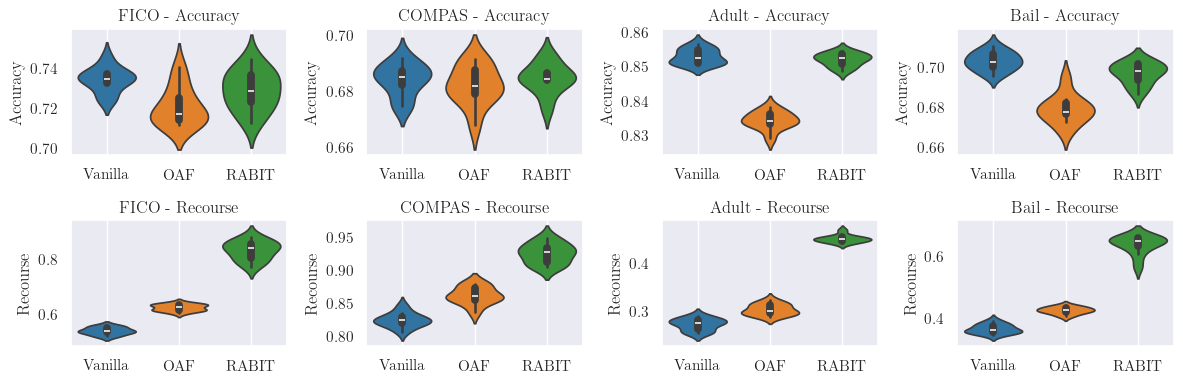

In [3]:
results_comparison = pd.read_csv('./results/results_comparison.csv')

make_violinplot(results_comparison)
plt.savefig('./figures/01_01_comparison.pdf', bbox_inches='tight', pad_inches=0.05)

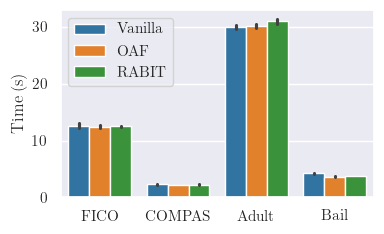

In [4]:
make_barplot(results_comparison, key='time')
plt.savefig('./figures/01_02_time.pdf', bbox_inches='tight', pad_inches=0.05)

In [5]:
make_latex(results_comparison, keys=['cost', 'sparsity', 'plausibility'], std=False)

FICO & $0.358$ & $0.315$ & $0.165$ & $2.155$ & $2.792$ & $1.078$ & $0.438$ & $0.44$ & $0.475$ \\
COMPAS & $0.23$ & $0.181$ & $0.112$ & $1.518$ & $1.553$ & $1.264$ & $0.436$ & $0.446$ & $0.466$ \\
Adult & $0.354$ & $0.308$ & $0.275$ & $1.467$ & $1.547$ & $1.422$ & $0.477$ & $0.464$ & $0.479$ \\
Bail & $0.449$ & $0.371$ & $0.225$ & $1.546$ & $1.563$ & $1.131$ & $0.508$ & $0.503$ & $0.519$ \\


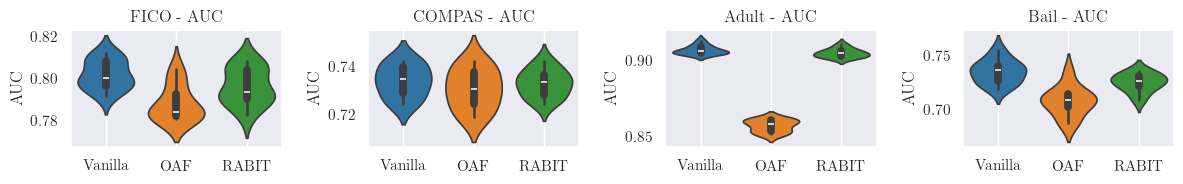

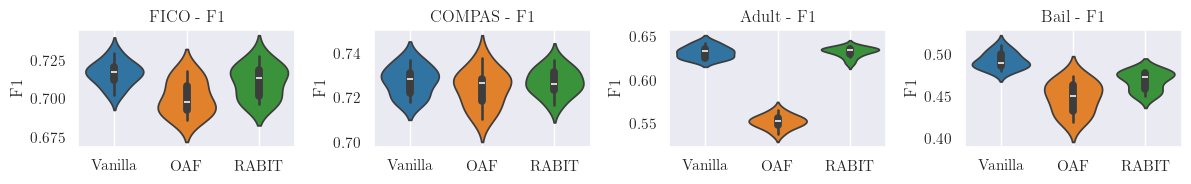

In [6]:
make_violinplot(results_comparison, keys=['AUC'])
plt.savefig('./figures/01_03_comparison_auc.pdf', bbox_inches='tight', pad_inches=0.05)

make_violinplot(results_comparison, keys=['f1'])
plt.savefig('./figures/01_04_comparison_f1.pdf', bbox_inches='tight', pad_inches=0.05)


In [7]:
print('cost')
make_latex(results_comparison, keys=['cost'])

print('sparsity')
make_latex(results_comparison, keys=['sparsity'])

print('plausibility')
make_latex(results_comparison, keys=['plausibility'])


cost
FICO & $0.358 \pm 0.01$ & $0.315 \pm 0.01$ & $0.165 \pm 0.03$ \\
COMPAS & $0.23 \pm 0.02$ & $0.181 \pm 0.01$ & $0.112 \pm 0.01$ \\
Adult & $0.354 \pm 0.0$ & $0.308 \pm 0.01$ & $0.275 \pm 0.0$ \\
Bail & $0.449 \pm 0.02$ & $0.371 \pm 0.01$ & $0.225 \pm 0.03$ \\
sparsity
FICO & $2.155 \pm 0.06$ & $2.792 \pm 0.08$ & $1.078 \pm 0.05$ \\
COMPAS & $1.518 \pm 0.05$ & $1.553 \pm 0.05$ & $1.264 \pm 0.04$ \\
Adult & $1.467 \pm 0.07$ & $1.547 \pm 0.1$ & $1.422 \pm 0.14$ \\
Bail & $1.546 \pm 0.1$ & $1.563 \pm 0.05$ & $1.131 \pm 0.03$ \\
plausibility
FICO & $0.438 \pm 0.0$ & $0.44 \pm 0.0$ & $0.475 \pm 0.0$ \\
COMPAS & $0.436 \pm 0.01$ & $0.446 \pm 0.01$ & $0.466 \pm 0.01$ \\
Adult & $0.477 \pm 0.01$ & $0.464 \pm 0.01$ & $0.479 \pm 0.01$ \\
Bail & $0.508 \pm 0.0$ & $0.503 \pm 0.0$ & $0.519 \pm 0.0$ \\


## Exp 2. Trade-off Analysis

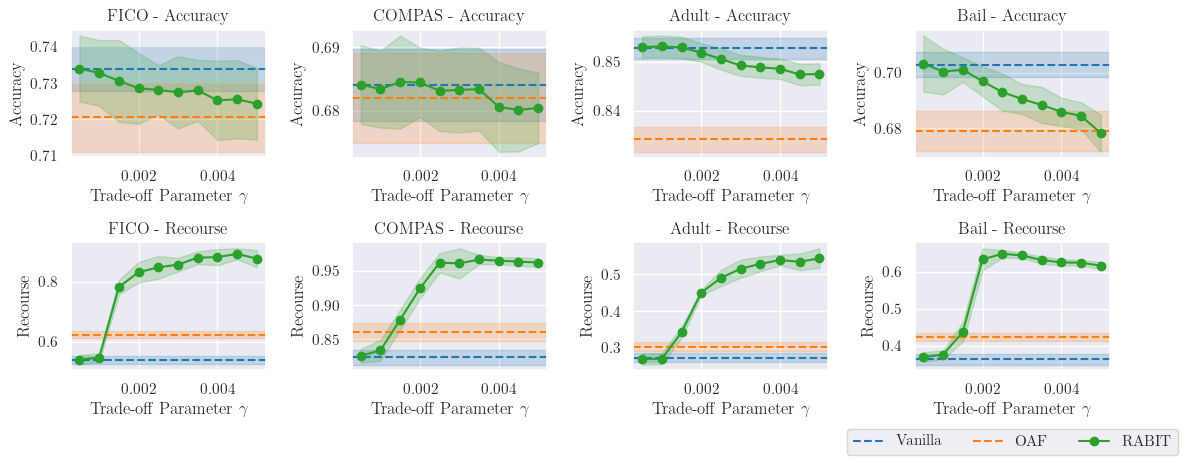

In [8]:
make_tradeoff(results_comparison)
plt.savefig('./figures/02_tradeoff.pdf', bbox_inches='tight', pad_inches=0.05)

## Exp 3. Leaf Refinement

In [9]:
def make_scatter(
    results_weights, 
    group='eta',
    keys=['accuracy', 'recourse'], 
    palette={'Vanilla': 'tab:blue', 'OAF': 'tab:orange', 'RABIT': 'tab:green'}
):
    
    plt.figure(figsize=(12, 3))
    datasets = results_weights['dataset'].unique()

    for i, dataset in enumerate(datasets):
        results_dataset = results_weights[results_weights['dataset'] == dataset]
        results_vanilla = results_dataset[results_dataset['method'] == 'Vanilla'].groupby(group)
        results_oaf = results_dataset[results_dataset['method'] == 'OAF'].groupby(group)
        results_rabit = results_dataset[results_dataset['method'] == 'RABIT'].groupby(group)
        plt.subplot(1, len(datasets), i + 1)

        x = results_vanilla[keys[0]].mean().values
        y = results_vanilla[keys[1]].mean().values
        plt.scatter(x, y, label='Vanilla', color=palette['Vanilla'], marker='o', s=80)
        
        x = results_oaf[keys[0]].mean().values
        y = results_oaf[keys[1]].mean().values
        plt.scatter(x, y, label='OAF', color=palette['OAF'], marker='^', s=80)
        
        x = results_rabit[keys[0]].mean().values
        y = results_rabit[keys[1]].mean().values
        plt.scatter(x, y, label='RABIT', color=palette['RABIT'], marker='s', s=80)
        
        x_key = keys[0].capitalize() if keys[0] != 'AUC' else keys[0]
        y_key = keys[1].capitalize() if keys[1] != 'AUC' else keys[1]
        plt.xlabel(x_key)
        plt.ylabel(y_key)
        plt.title('{}'.format(dataset))
        if i == 0: plt.legend()
                
    plt.tight_layout()

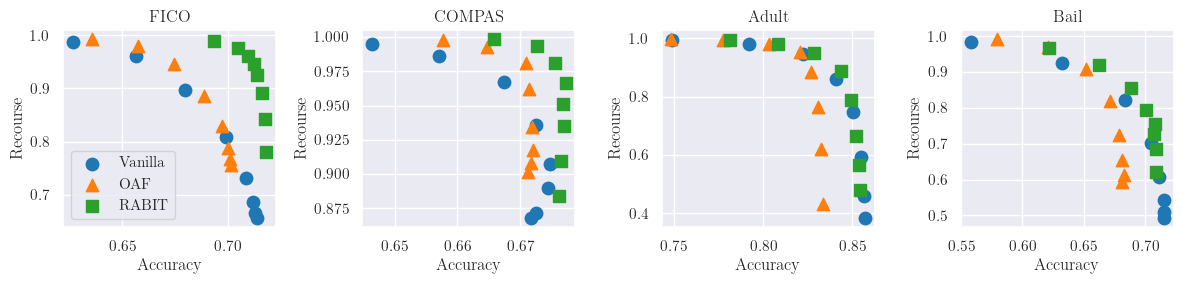

In [10]:
results_weights = pd.read_csv('./results/results_weights.csv')

make_scatter(results_weights)
plt.savefig('./figures/03_leaf_refinement.pdf', bbox_inches='tight', pad_inches=0.05)

## Exp 4. Sensitivity Analyses (Appendix)

In [11]:
def make_sensitivity(
    results,
    param_key,
    param_label,
    keys=['accuracy', 'recourse'],
    palette={'Vanilla': 'tab:blue', 'OAF': 'tab:orange', 'RABIT': 'tab:green'}    
):
    
    plt.figure(figsize=(12, 1 + 2 * len(keys)))
    params = np.sort(results[param_key].unique())
    datasets = results['dataset'].unique()

    for i, dataset in enumerate(datasets):
        results_dataset = results[results['dataset'] == dataset]
        results_vanilla = results_dataset[results_dataset['method'] == 'Vanilla'].groupby(param_key)
        results_oaf = results_dataset[results_dataset['method'] == 'OAF'].groupby(param_key)
        results_rabit = results_dataset[results_dataset['method'] == 'RABIT'].groupby(param_key)

        for j, key in enumerate(keys):
            plt.subplot(len(keys), len(datasets), i + j * len(datasets) + 1)

            key_mean = results_vanilla[key].mean().values
            key_std = results_vanilla[key].std().values
            plt.plot(params, key_mean, marker='o', label='Vanilla', color=palette['Vanilla'])
            plt.fill_between(params, key_mean - key_std, key_mean + key_std, alpha=0.2, color=palette['Vanilla'])
            
            key_mean = results_oaf[key].mean().values
            key_std = results_oaf[key].std().values
            plt.plot(params, key_mean, marker='o', label='OAF', color=palette['OAF'])
            plt.fill_between(params, key_mean - key_std, key_mean + key_std, alpha=0.2, color=palette['OAF'])
            
            key_mean = results_rabit[key].mean().values
            key_std = results_rabit[key].std().values
            plt.plot(params, key_mean, marker='o', label='RABIT', color=palette['RABIT'])
            plt.fill_between(params, key_mean - key_std, key_mean + key_std, alpha=0.2, color=palette['RABIT'])
            
            key = key.capitalize() if key != 'AUC' else key
            plt.xlabel(param_label)
            plt.ylabel(key)
            plt.title('{} - {}'.format(dataset, key))

            if i==len(datasets)-1 and j==len(keys)-1:
                plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.4), ncol=3)      
                
    plt.tight_layout()

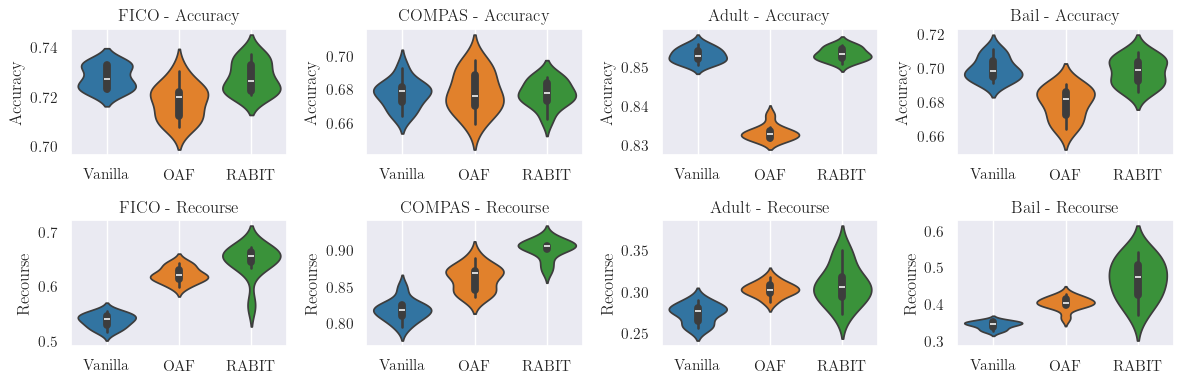

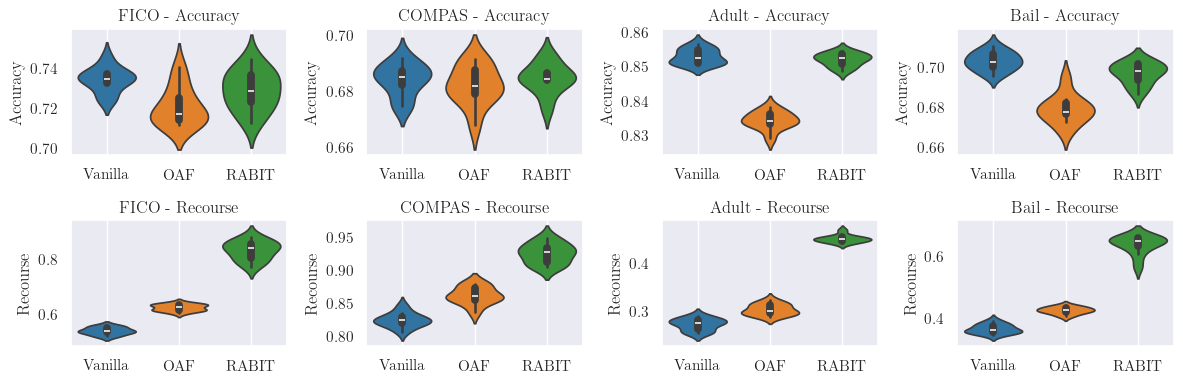

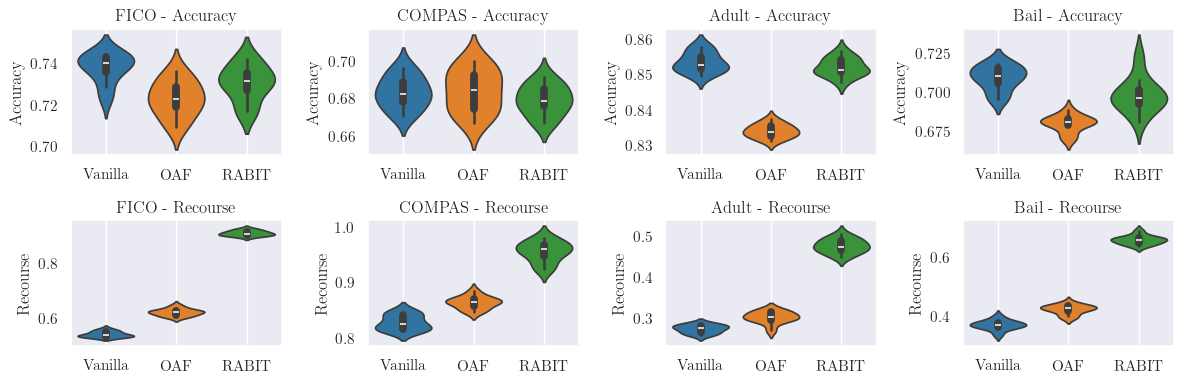

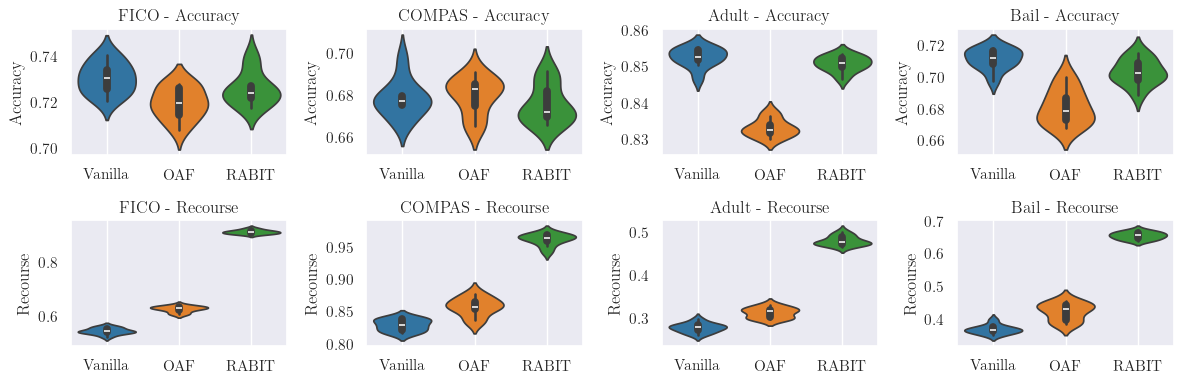

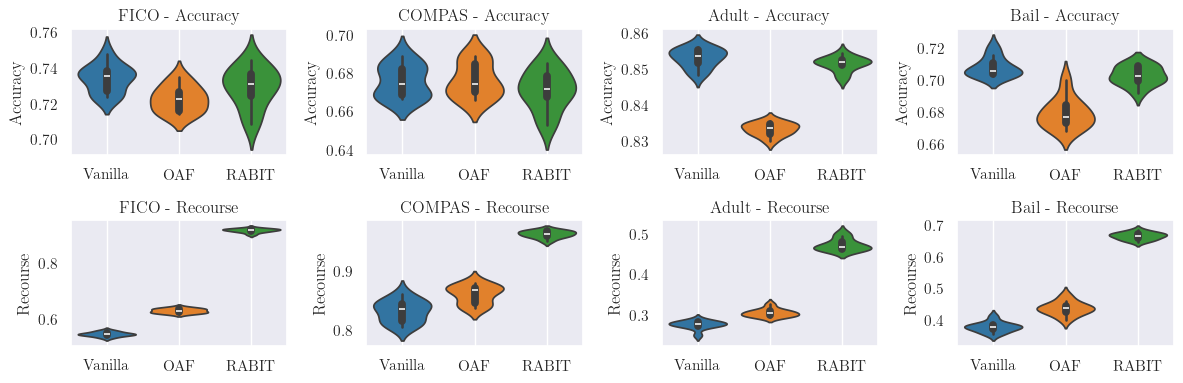

In [12]:
results_trees = pd.read_csv('./results/results_trees.csv')

for n_estimators in np.sort(results_trees['n_estimators'].unique()):
    results = results_trees[results_trees['n_estimators'] == n_estimators]
    make_violinplot(results, gamma=0.002)
    plt.savefig('./figures/04_01_trees_{}.pdf'.format(n_estimators), bbox_inches='tight', pad_inches=0.05)
    

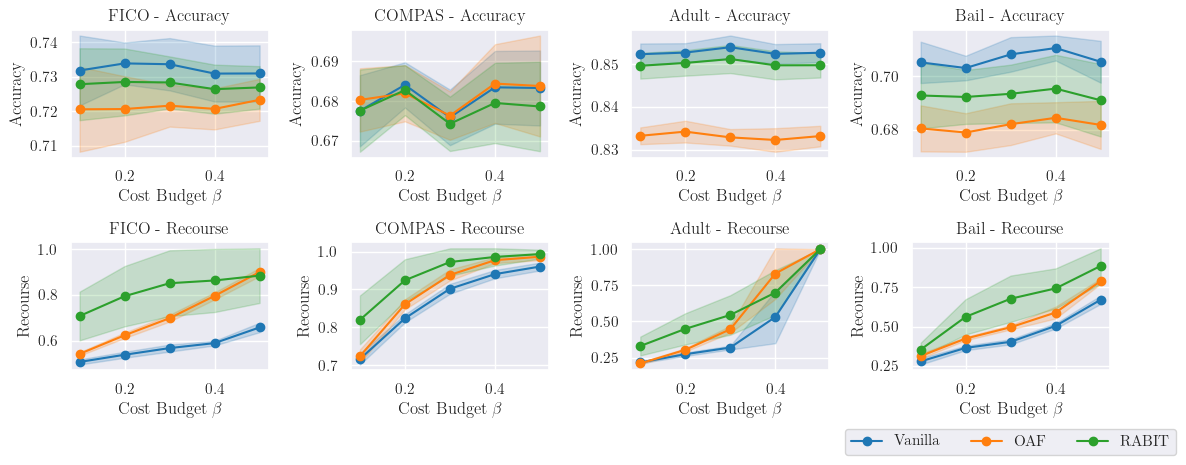

In [13]:
results_budget = pd.read_csv('./results/results_budget.csv')

make_sensitivity(results_budget, param_key='cost_budget', param_label=r'Cost Budget $\beta$')
plt.savefig('./figures/04_02_budget.pdf', bbox_inches='tight', pad_inches=0.05)

## Exp 5. Intercept Adjustment (Appendix)

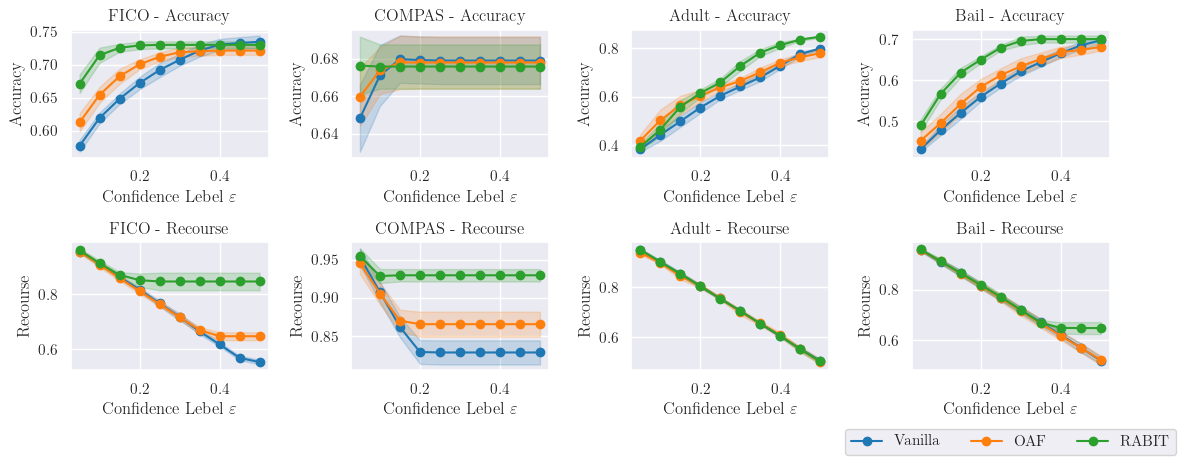

In [14]:
results_intercept = pd.read_csv('./results/results_intercept.csv')

make_sensitivity(results_intercept, param_key='epsilon', param_label=r'Confidence Lebel $\varepsilon$')
plt.savefig('./figures/05_intercept_adjustment.pdf', bbox_inches='tight', pad_inches=0.05)

## Exp 6. Brittleness Analysis (Appendix)

In [15]:
results_brittleness = pd.read_csv('./results/results_brittleness.csv')

make_latex(results_brittleness, keys=['brittleness'])


FICO & $0.064 \pm 0.0$ & $0.098 \pm 0.01$ & $0.063 \pm 0.0$ \\
COMPAS & $0.107 \pm 0.0$ & $0.114 \pm 0.0$ & $0.113 \pm 0.0$ \\
Adult & $0.04 \pm 0.0$ & $0.064 \pm 0.0$ & $0.043 \pm 0.0$ \\
Bail & $0.112 \pm 0.01$ & $0.144 \pm 0.01$ & $0.105 \pm 0.01$ \\
